<a href="https://colab.research.google.com/github/nithishpatel/Stock-market-analysis/blob/main/tatadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import datetime as dt
from math import acos,degrees
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [280]:
df= pd.read_csv('tata.csv',encoding = "ISO-8859-1")

In [281]:
df.head()

,scrip,date,time,Open,High,Low,Close,Volume,Unnamed: 8
0,TATASTEEL,24-06-2013,9:20,270.30,270.40,270.10,270.20,30794,NaN
1,TATASTEEL,24-06-2013,9:21,270.10,270.30,270.05,270.25,31049,NaN
2,TATASTEEL,24-06-2013,9:22,270.25,270.85,270.25,270.65,15813,NaN
3,TATASTEEL,24-06-2013,9:23,270.80,271.60,270.25,270.40,32092,NaN
4,TATASTEEL,24-06-2013,9:24,270.15,271.10,270.15,271.05,15286,NaN


In [282]:
df= df.iloc[::10,1:8]

In [283]:
df.head()

,date,time,Open,High,Low,Close,Volume
0,24-06-2013,9:20,270.30,270.4,270.10,270.2,30794
10,24-06-2013,9:30,271.95,272.6,271.90,272.5,32683
20,24-06-2013,9:40,272.25,272.7,272.25,272.6,11347
30,24-06-2013,9:50,274.35,274.6,273.75,273.9,24191
40,24-06-2013,10:00,273.50,273.7,273.40,273.5,7056


In [284]:
avg1=df['Low']
avg2=df['High']
avg3=(avg1+avg2)/2
avg=pd.DataFrame(avg3)
df['Average']= avg.round(2)

In [285]:
df=df.drop(['Open','High','Low', 'Close'], axis=1)

In [286]:
vol=df['Volume']
vol=vol.values

In [287]:
dates=pd.DataFrame(df['date'])

In [288]:
dates=dates.values

In [289]:
x= df.values

In [290]:
h=df['date'].unique()

In [291]:
unidays=pd.DataFrame(h)
unidays=unidays.values


In [292]:
temp =[]
j=int(input())
for i in range(23082):
  if np.array_equal(unidays[j],dates[i])==True:
    y= x[i]
    temp.append(y)


6


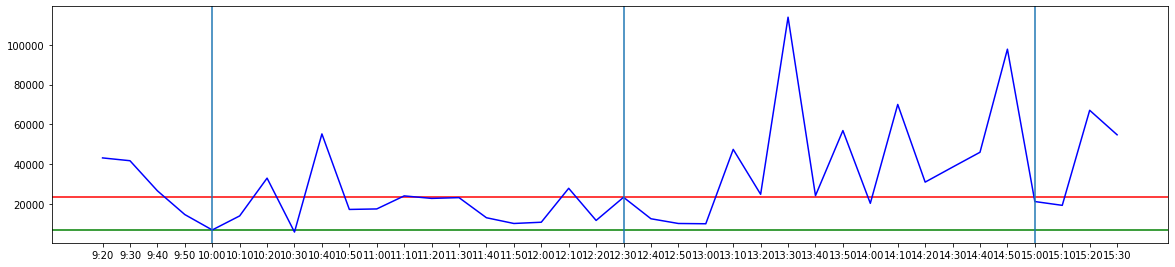

In [293]:
day1= pd.DataFrame(temp)
avg_var=day1.iloc[:,2]
time=day1.iloc[:,1]
plt.figure(figsize=(20,20))
plt.subplot(411)
plt.axhline(y=avg_var[4],color='g')
plt.axhline(y=avg_var[19],color='r')
plt.plot(time,avg_var, color='blue', label='Tata Steel')
plt.axvline(x=4)
plt.axvline(x=19)
plt.axvline(x=34)

In [294]:
x[0][2]

30794

In [295]:
#calculating percent change for all data
per_c=[]
per_main=[]
df2=[]
for j in range(616):
  for i in range(23082):
    if unidays[j]==dates[i]:
      per_main.append(x[i][2])
    else:
      continue
  per_c=int(((per_main[4]-per_main[19])/per_main[4])*100)
  df2.append(per_c)
  per_main=[0]

In [296]:
per_c2=[]
per_main2=[]
df3=[]
for j in range(616):
  for i in range(23082):
    if unidays[j]==dates[i]:
      per_main2.append(x[i][2])
    else:
      continue
  per_c2=int(((per_main2[1]-per_main2[-3])/per_main2[1])*100)
  df3.append(per_c2)
  per_main2=[0]


In [301]:
volume=[]
for j in range(616):
  for i in range(23082):
    if unidays[j]==dates[i]:
      volume.append(vol[j])
    else:
      continue
  if volume[i]>volume[j]:
    stre=vol[j]
  else:
    stre=vol[j]

In [302]:
volume=pd.DataFrame(volume)
volume.shape

(23082, 1)

In [251]:
df2=pd.DataFrame(df2)
df2=df2.values
df3=pd.DataFrame(df3)
df3=df3.values

In [252]:
df2=df2.round(2)
df3=df3.round(2)

In [253]:
trend=[]
n=[]
a=float(0.0)
b=float(2.0)
c=float(-1.0)
d=float(-2.0)
e=float(-6.0)
f=float(6.0)
for i in range(616):
  if df2[i]<=f and df2[i]>=a:
    trend.append(0)
    n.append(df2[i])
  elif df2[i]<a and df2[i]>=e:
    trend.append(1)
    n.append(df2[i])


In [254]:
trend=pd.DataFrame(trend)
df2= pd.DataFrame(df2)
df3=pd.DataFrame(df3)
unidays= pd.DataFrame(unidays)

In [255]:
#creating data_frame to train the model

input_df= pd.DataFrame() 

input_df['Date']= unidays.iloc[:,0]
input_df['Per_change']=df2.iloc[:,0]
input_df['Day_change']=df3
input_df['Trend']= trend.iloc[:,0]
volume=df['Volume']
input_df['Volume']=volume

In [256]:
input_df=input_df.iloc[:,1:]
input_df

,Per_change,Day_change,Trend,Volume
0,-7,73,0.0,30794.0
1,-62,-77,1.0,NaN
2,94,-40,1.0,NaN
3,16,-103,1.0,NaN
4,42,69,0.0,NaN
...,...,...,...,...
611,8,27,NaN,NaN
612,-10,23,NaN,NaN
613,36,-15,NaN,NaN
614,86,-357,NaN,NaN


In [257]:
input_df['Per_change'].unique()

array([    -7,    -62,     94,     16,     42,      6,     20,     68,
           82,     65,     62,   -256,     44,   -143,   -315,     75,
           85,   -129,     71,     79,     47,     48,   -130,     90,
          -52,     22,     57,    -39,   -132,   -224,    -13,     80,
           73,     91,     74,     11,     -5,     33,     76,    -24,
           -9,     17,     -3,     28,     70,     77,     24,    -74,
          -59,     63,    -50,    -55,   -436,     89,     93,     50,
           51,    -38,    -25,   -234,     81,     32,     58,     67,
           64,   -152,     96,     38,     31,    -28,     84,     53,
         -218,   -445,   -178,     69,    -54,     54,     43,   -912,
         -531,     78,    -29,     41,     36,     92,    -18,    -31,
         -125,     60,     72,   -985,    -15,    -51,     87,     97,
           95,   -231,     49,   -255,      7,   -548,   -135,   -434,
           -4,   -166,     88,   -171,     83,     66,    -21,     86,
      

In [258]:
z= input_df.iloc[600:610,:]

In [259]:
input_df

,Per_change,Day_change,Trend,Volume
0,-7,73,0.0,30794.0
1,-62,-77,1.0,NaN
2,94,-40,1.0,NaN
3,16,-103,1.0,NaN
4,42,69,0.0,NaN
...,...,...,...,...
611,8,27,NaN,NaN
612,-10,23,NaN,NaN
613,36,-15,NaN,NaN
614,86,-357,NaN,NaN


In [260]:
#z= z.drop('Trend', axis=1)

In [261]:
#le=LabelEncoder()
#input_df.iloc[:,1]=le.fit_transform(input_df.iloc[:,1])

In [262]:
input_df.dtypes

Per_change      int64
Day_change      int64
Trend         float64
Volume        float64
dtype: object

In [263]:
X=input_df.iloc[:,0:2].values
Y=input_df.iloc[:,2].values

In [264]:
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size= 0.4)

In [265]:
b=pd.DataFrame(x_train)
b.shape

(369, 2)

In [266]:
#x_train=x_train.reshape(-1, 1)
#y_train=y_train.reshape(-1, 1)


In [267]:
rfc= RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=5)

In [268]:
y=rfc.fit(x_train,y_train)

ValueError: ignored

In [ ]:
z= rfc.predict(x_test)

In [ ]:
score=accuracy_score(z,y_test)
print(score)

In [ ]:
report=classification_report(z,y_test)
print(report)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression


In [ ]:
clf.fit(x_train,y_train)